# Introduction to TensorFlow
> Before you can build advanced models in TensorFlow 2.0, you will first need to understand the basics. In this chapter, you’ll learn how to define constants and variables, perform tensor addition and multiplication, and compute derivatives. Knowledge of linear algebra will be helpful, but not necessary. This is the Summary of lecture "Introduction to TensorFlow in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow-Keras, Deep_Learning]
- image: images/tf.png

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.__version__

'2.1.0'

## Constants and variables
- Tensorflow
    - Open-source library for graph-based numerical computation
    - Low and high level API
        - Addition, multiplication, differentiation
        - Machine Learning models
    - In v2.0
        - Eager execution by default
        - Model building with Keras and Estimators
- Tensor
    - Generalization of vectors and matrices
    - Collection of numbers
    - Specific shape

### Defining data as constants
Throughout this course, we will use `tensorflow` version 2.1 and will exclusively import the submodules needed to complete each exercise. 

you will use it to transform a numpy array, `credit_numpy`, into a tensorflow constant, `credit_constant`. This array contains feature columns from a dataset on credit card holders.

Note that tensorflow version 2.0 allows you to use data as either a numpy array or a tensorflow constant object. Using a constant will ensure that any operations performed with that object are done in tensorflow.

In [2]:
credit = pd.read_csv('./dataset/credit.csv')
credit_numpy = credit.to_numpy()
credit.head()

,0,1,2,3
0,2.0,1.0,24.0,3913.0
1,2.0,2.0,26.0,2682.0
2,2.0,2.0,34.0,29239.0
3,2.0,1.0,37.0,46990.0
4,2.0,1.0,57.0,8617.0


In [3]:
# Convert the credit_numpy array into  a tensorflow constant
credit_constant = tf.constant(credit_numpy)

# Print constant datatype
print('The datatype is:', credit_constant.dtype)

# Print constant shape
print('The shape is:', credit_constant.shape)

The datatype is: <dtype: 'float64'>
The shape is: (30000, 4)


### Defining variables
Unlike a constant, a variable's value can be modified. This will be quite useful when we want to train a model by updating its parameters. Constants can't be used for this purpose, so variables are the natural choice.

Let's try defining and working with a variable. 

In [4]:
# Detine the 1-dimensional variable A1
A1 = tf.Variable([1, 2, 3, 4])

# Print the variable A1
print(A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>
[1 2 3 4]


## Basic operations
- TensorFlow operation
    - model of computation that revolves around the use of graphs
    - Graph contains edges and nodes, where edges are tensors and the nodes are operations
- Performing tensor addition
    - The `add()` operation performs **element-wise addition** with two tensors
    - Element-wise addition requires both tensors to have the same shape:
        - Scalar addition: $1 + 2 = 3$
        - Vector addition: $[1, 2] + [3, 4] = [4, 6]$
        - Matrix addition: $\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} + \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} = \begin{bmatrix} 6 & 8 \\ 10 & 12 \end{bmatrix}$
    - Operator is overloaded with $+$
- Performing tensor multiplication
    - **Element-wise multiplication** performed using `multiply()` operation
    - Matrix multiplication performed with `matmul()` operator
        - The `matmul(A, B)` operation multiplies A by B
        - Number of columns of A must equal the number of rows of B
- Summing over tensor dimensions
    - The `reduce_sum()` operator sums over the dimensions of a tensor
        - `reduce_sum(A)` sums over all dimensions of A
        - `reduce_sum(A, i)` sums over dimension i
    

### Performing element-wise multiplication
Element-wise multiplication in TensorFlow is performed using two tensors with identical shapes. This is because the operation multiplies elements in corresponding positions in the two tensors. An example of an element-wise multiplication, denoted by the $\odot$ symbol, is shown below:

$$ \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix} \odot \begin{bmatrix} 3 & 1 \\ 2 & 5 \end{bmatrix} = \begin{bmatrix} 3 & 2 \\ 4 & 5 \end{bmatrix} $$

In this exercise, you will perform element-wise multiplication, paying careful attention to the shape of the tensors you multiply.

In [5]:
# Define tensors A1 and A23 as constants
A1 = tf.constant([1, 2, 3, 4])
A23 = tf.constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = tf.ones_like(A1)
B23 = tf.ones_like(A23)

# Perform element-wise multiplication
C1 = tf.multiply(A1, B1)
C23 = tf.multiply(A23, B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


Notice how performing element-wise multiplication with tensors of ones leaves the original tensors unchanged.

### Making predictions with matrix multiplication
In later chapters, you will learn to train linear regression models. This process will yield a vector of parameters that can be multiplied by the input data to generate predictions. In this exercise, you will use input data, `features`, and a target vector, `bill`, which are taken from a credit card dataset we will use later in the course.

$$ \text{features} = \begin{bmatrix} 2 & 24 \\ 2 & 26 \\ 2 & 57 \\ 1 & 37 \end{bmatrix}, 
\text{bill} = \begin{bmatrix} 3913 \\ 2682 \\ 8617 \\ 64400 \end{bmatrix}, \text{params} = \begin{bmatrix} 1000 \\ 150 \end{bmatrix} $$

The matrix of input data, `features`, contains two columns: education level and age. The target vector, `bill`, is the size of the credit card borrower's bill.

Since we have not trained the model, you will enter a guess for the values of the parameter vector, `params`. You will then use `matmul()` to perform matrix multiplication of features by `params` to generate predictions, `billpred`, which you will compare with `bill`.

In [6]:
# Define features, params, and bill as constants
features = tf.constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = tf.constant([[1000], [150]])
bill = tf.constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = tf.matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


### Summing over tensor dimensions
You've been given a matrix, `wealth`. This contains the value of bond and stock wealth for five individuals in thousands of dollars.
$$\text{wealth} = \begin{bmatrix} 11 & 50 \\ 7 & 2 \\ 4 & 60 \\ 3 & 0 \\ 25 & 10 \end{bmatrix} $$

The first column corresponds to bonds and the second corresponds to stocks. Each row gives the bond and stock wealth for a single individual.

In [7]:
wealth = tf.constant([[11, 50], [7, 2], [4, 60], [3, 0], [25, 10]])

In [8]:
tf.reduce_sum(wealth)

<tf.Tensor: shape=(), dtype=int32, numpy=172>

In [9]:
tf.reduce_sum(wealth, 1)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([61,  9, 64,  3, 35])>

## Advanced operations
- Finding th optimum
    - In many problems, we will want to find the optimum of a function
        - Minimum: Lowest value of a loss function
        - Maximum: Highest value of objective function
    - We can do this using the `gradient()` operation
        - Optimum: Find a point where gradient = 0
        - Minimum: Change in gradient > 0
        - Maximum: Change in gradient < 0

### Reshaping tensors
Later in the course, you will classify images of sign language letters using a neural network. In some cases, the network will take 1-dimensional tensors as inputs, but your data will come in the form of images, which will either be either 2- or 3-dimensional tensors, depending on whether they are grayscale or color images.

The figure below shows grayscale and color images of the sign language letter A. The two images have been imported for you and converted to the numpy arrays `gray_tensor` and `color_tensor`. Reshape these arrays into 1-dimensional vectors using the `reshape` operation, which has been imported for you from tensorflow. Note that the shape of `gray_tensor` is 28x28 and the shape of `color_tensor` is 28x28x3.
![sign](image/sign_1_10.jpg)

In [10]:
gray_tensor = pd.read_csv('./dataset/gray_tensor.csv').to_numpy()

color_tensor = pd.read_csv('./dataset/color_tensor.csv').to_numpy().reshape(28, 28, 3)

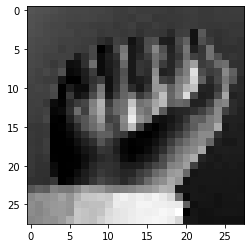

In [11]:
import matplotlib.pyplot as plt

plt.imshow(gray_tensor, cmap=plt.cm.binary);
# plt.imshow(image, interpolation='nearest')

In [12]:
# Reshape the grayscale image tensor into a vector
gray_vector = tf.reshape(gray_tensor, (784, 1))

# Reshape the color image tensor into a vector
color_vector = tf.reshape(color_tensor, (2352, 1))

### Optimizing with gradients
You are given a loss function, `y=x^2`, which you want to minimize. You can do this by computing the slope using the `GradientTape()` operation at different values of `x`. If the slope is positive, you can decrease the loss by lowering `x`. If it is negative, you can decrease it by increasing `x`. This is how gradient descent works.
![gradient](image/gradient_plot.png)

In practice, you will use a high level tensorflow operation to perform gradient descent automatically. In this exercise, however, you will compute the slope at x values of -1, 1, and 0. 

In [13]:
def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = tf.Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = x * x
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


Notice that the slope is positive at x = 1, which means that we can lower the loss by reducing x. The slope is negative at x = -1, which means that we can lower the loss by increasing x. The slope at x = 0 is 0, which means that we cannot lower the loss by either increasing or decreasing x. This is because the loss is minimized at x = 0.

### Working with image data
You are given a black-and-white image of a letter, which has been encoded as a tensor, `letter`. You want to determine whether the letter is an X or a K. You don't have a trained neural network, but you do have a simple model, `model`, which can be used to classify `letter`.

The 3x3 tensor, `letter`, and the 1x3 tensor, `model`, are available in the Python shell. You can determine whether letter is a K by multiplying letter by model, summing over the result, and then checking if it is equal to 1. As with more complicated models, such as neural networks, `model` is a collection of weights, arranged in a tensor.

In [14]:
letter = np.array([[1.0, 0, 1.0], [1., 1., 0], [1., 0, 1.] ])
model = np.array([[1., 0., -1.]])

In [15]:
# Reshape model from a 1x3 to a 3x1 tensor
model = tf.reshape(model, (3, 1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0


Your model found that `prediction`=1.0 and correctly classified the letter as a K. In the coming chapters, you will use data to train a model, `model`, and then combine this with matrix multiplication, `matmul(letter, model)`, as we have done here, to make predictions about the classes of objects.